## Δημιουργήσαμε τα αρχικά σήματα και τα εμφανίσαμε

C:\Users\kosti_0b5rpb8\anaconda3\envs\dsp_project1\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


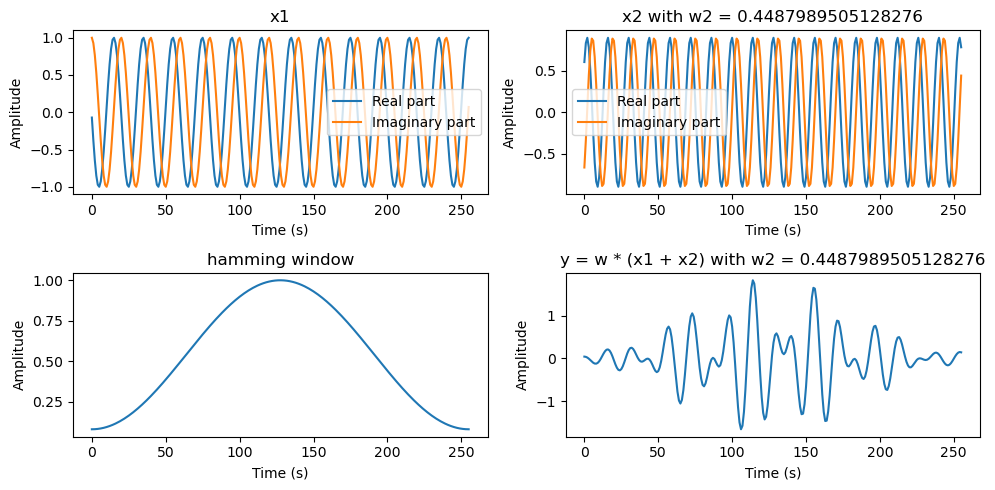

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from cmath import exp

# Initial values:
A1, A2 = 1, 0.9
L = 256
w1 = pi / 10
phi1, phi2 = np.random.uniform(0, 2 * pi), np.random.uniform(0, 2 * pi)

w2_arr = [pi / (7 + 0.5 * i) for i in range(6)]
for i in range(1, 10): w2_arr.append(pi / (9.5 + 0.05 * i))

x2_arr = np.array([[A2 * exp(1j * (w2 * n + phi2)) for n in range(L)] for w2 in w2_arr])

x1 = np.array([A1 * exp(1j * (w1 * n + phi1)) for n in range(L)])
w = np.hamming(L)

# C = A * B se np array to C θα έχει διαστάσεις του  A,B kai C[i] = A[i] * B[i] αντίστοιχα για το  +
y_arr = [w * (x1 + x2_arr[i]) for i in range(len(x2_arr))]

Ts = 1  # time interval between samples.
t = np.arange(0, L, Ts)

# Plot the signal
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0][0].plot(t, np.real(x1), label='Real part')
axs[0][0].plot(t, np.imag(x1), label='Imaginary part')
axs[0][0].set_xlabel('Time (s)')
axs[0][0].set_ylabel('Amplitude')
axs[0][0].set_title('x1')
axs[0][0].legend()

axs[0][1].plot(t, np.real(x2_arr[0]), label='Real part')
axs[0][1].plot(t, np.imag(x2_arr[0]), label='Imaginary part')
axs[0][1].set_xlabel('Time (s)')
axs[0][1].set_ylabel('Amplitude')
axs[0][1].set_title(f'x2 with w2 = {w2_arr[0]}')
axs[0][1].legend()

axs[1][0].plot(t, w)
axs[1][0].set_xlabel('Time (s)')
axs[1][0].set_ylabel('Amplitude')
axs[1][0].set_title('hamming window')

axs[1][1].plot(t, y_arr[0])
axs[1][1].set_xlabel('Time (s)')
axs[1][1].set_ylabel('Amplitude')
axs[1][1].set_title(f'y = w * (x1 + x2) with w2 = {w2_arr[0]}')

# Add spacing between subplots.
fig.tight_layout()

plt.show()

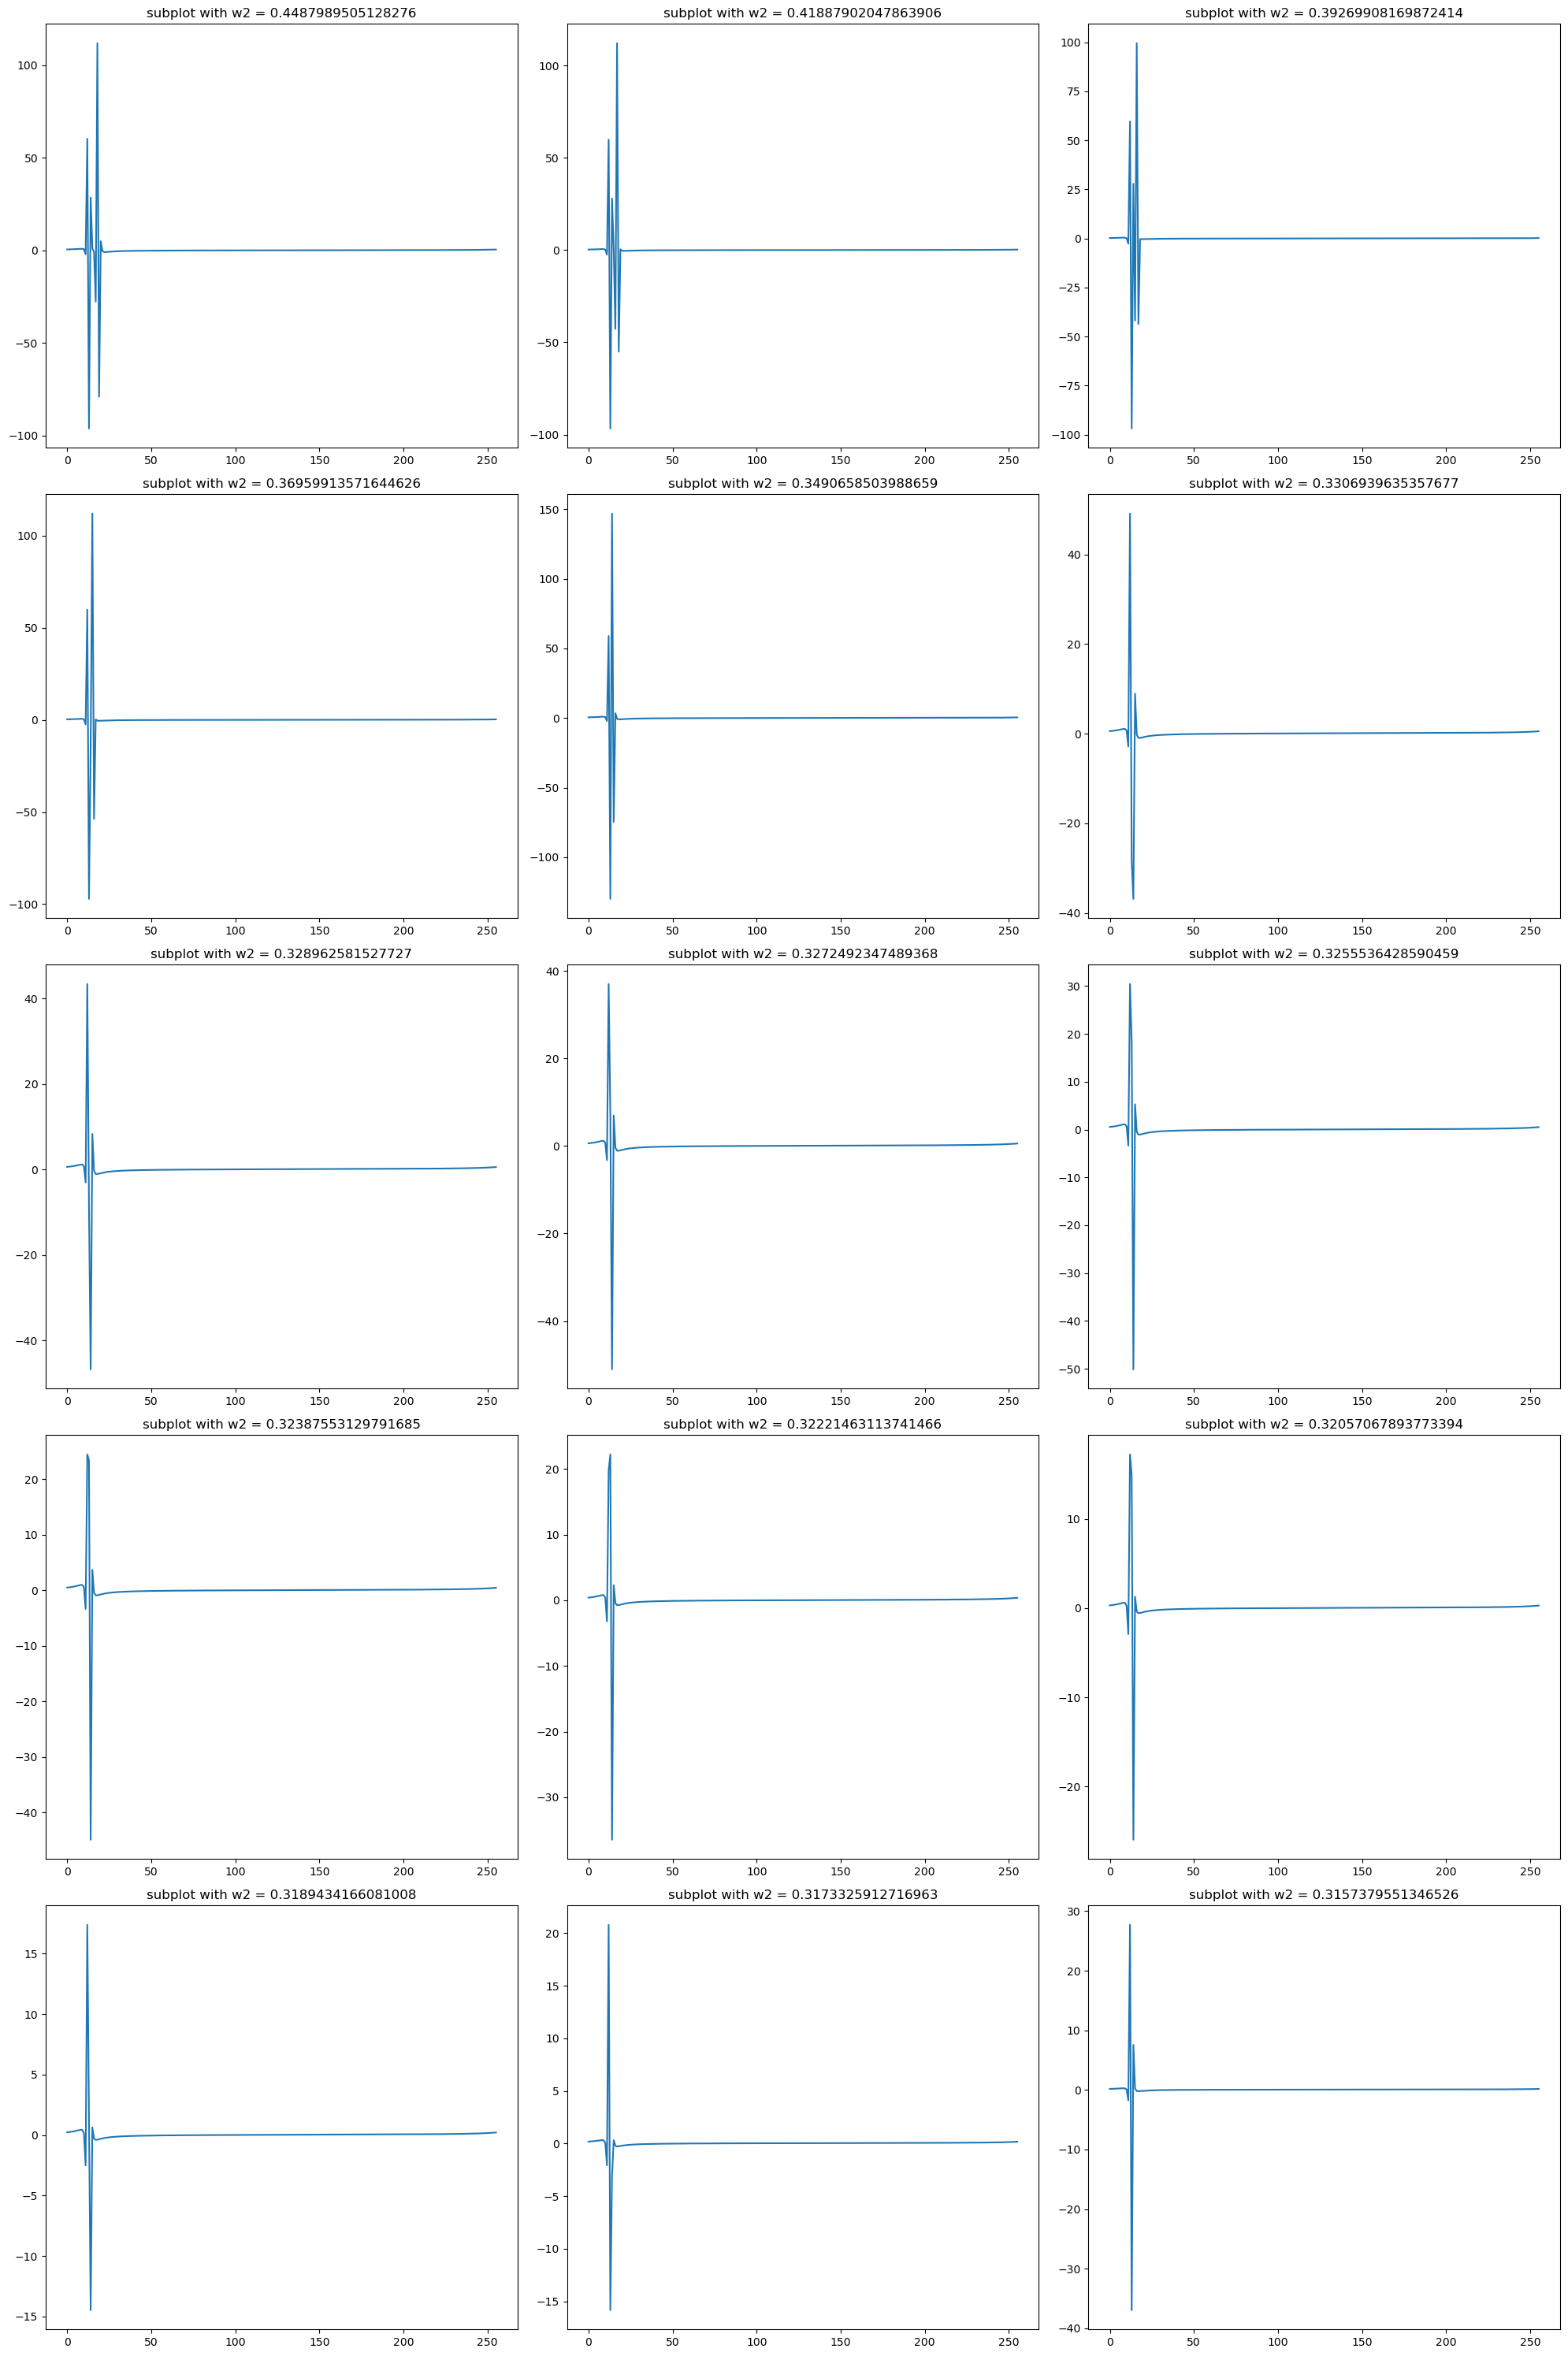

In [28]:
Y = [np.fft.fft(y) for y in y_arr]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, ax in enumerate(axes.flat):  # the flat func makes the 2d array into a 1d
    ax.plot(Y[i], label='Y')
    ax.set_title(f'subplot with w2 = {w2_arr[i]}')

fig.tight_layout()

plt.show()

### 1.2 changing dft length

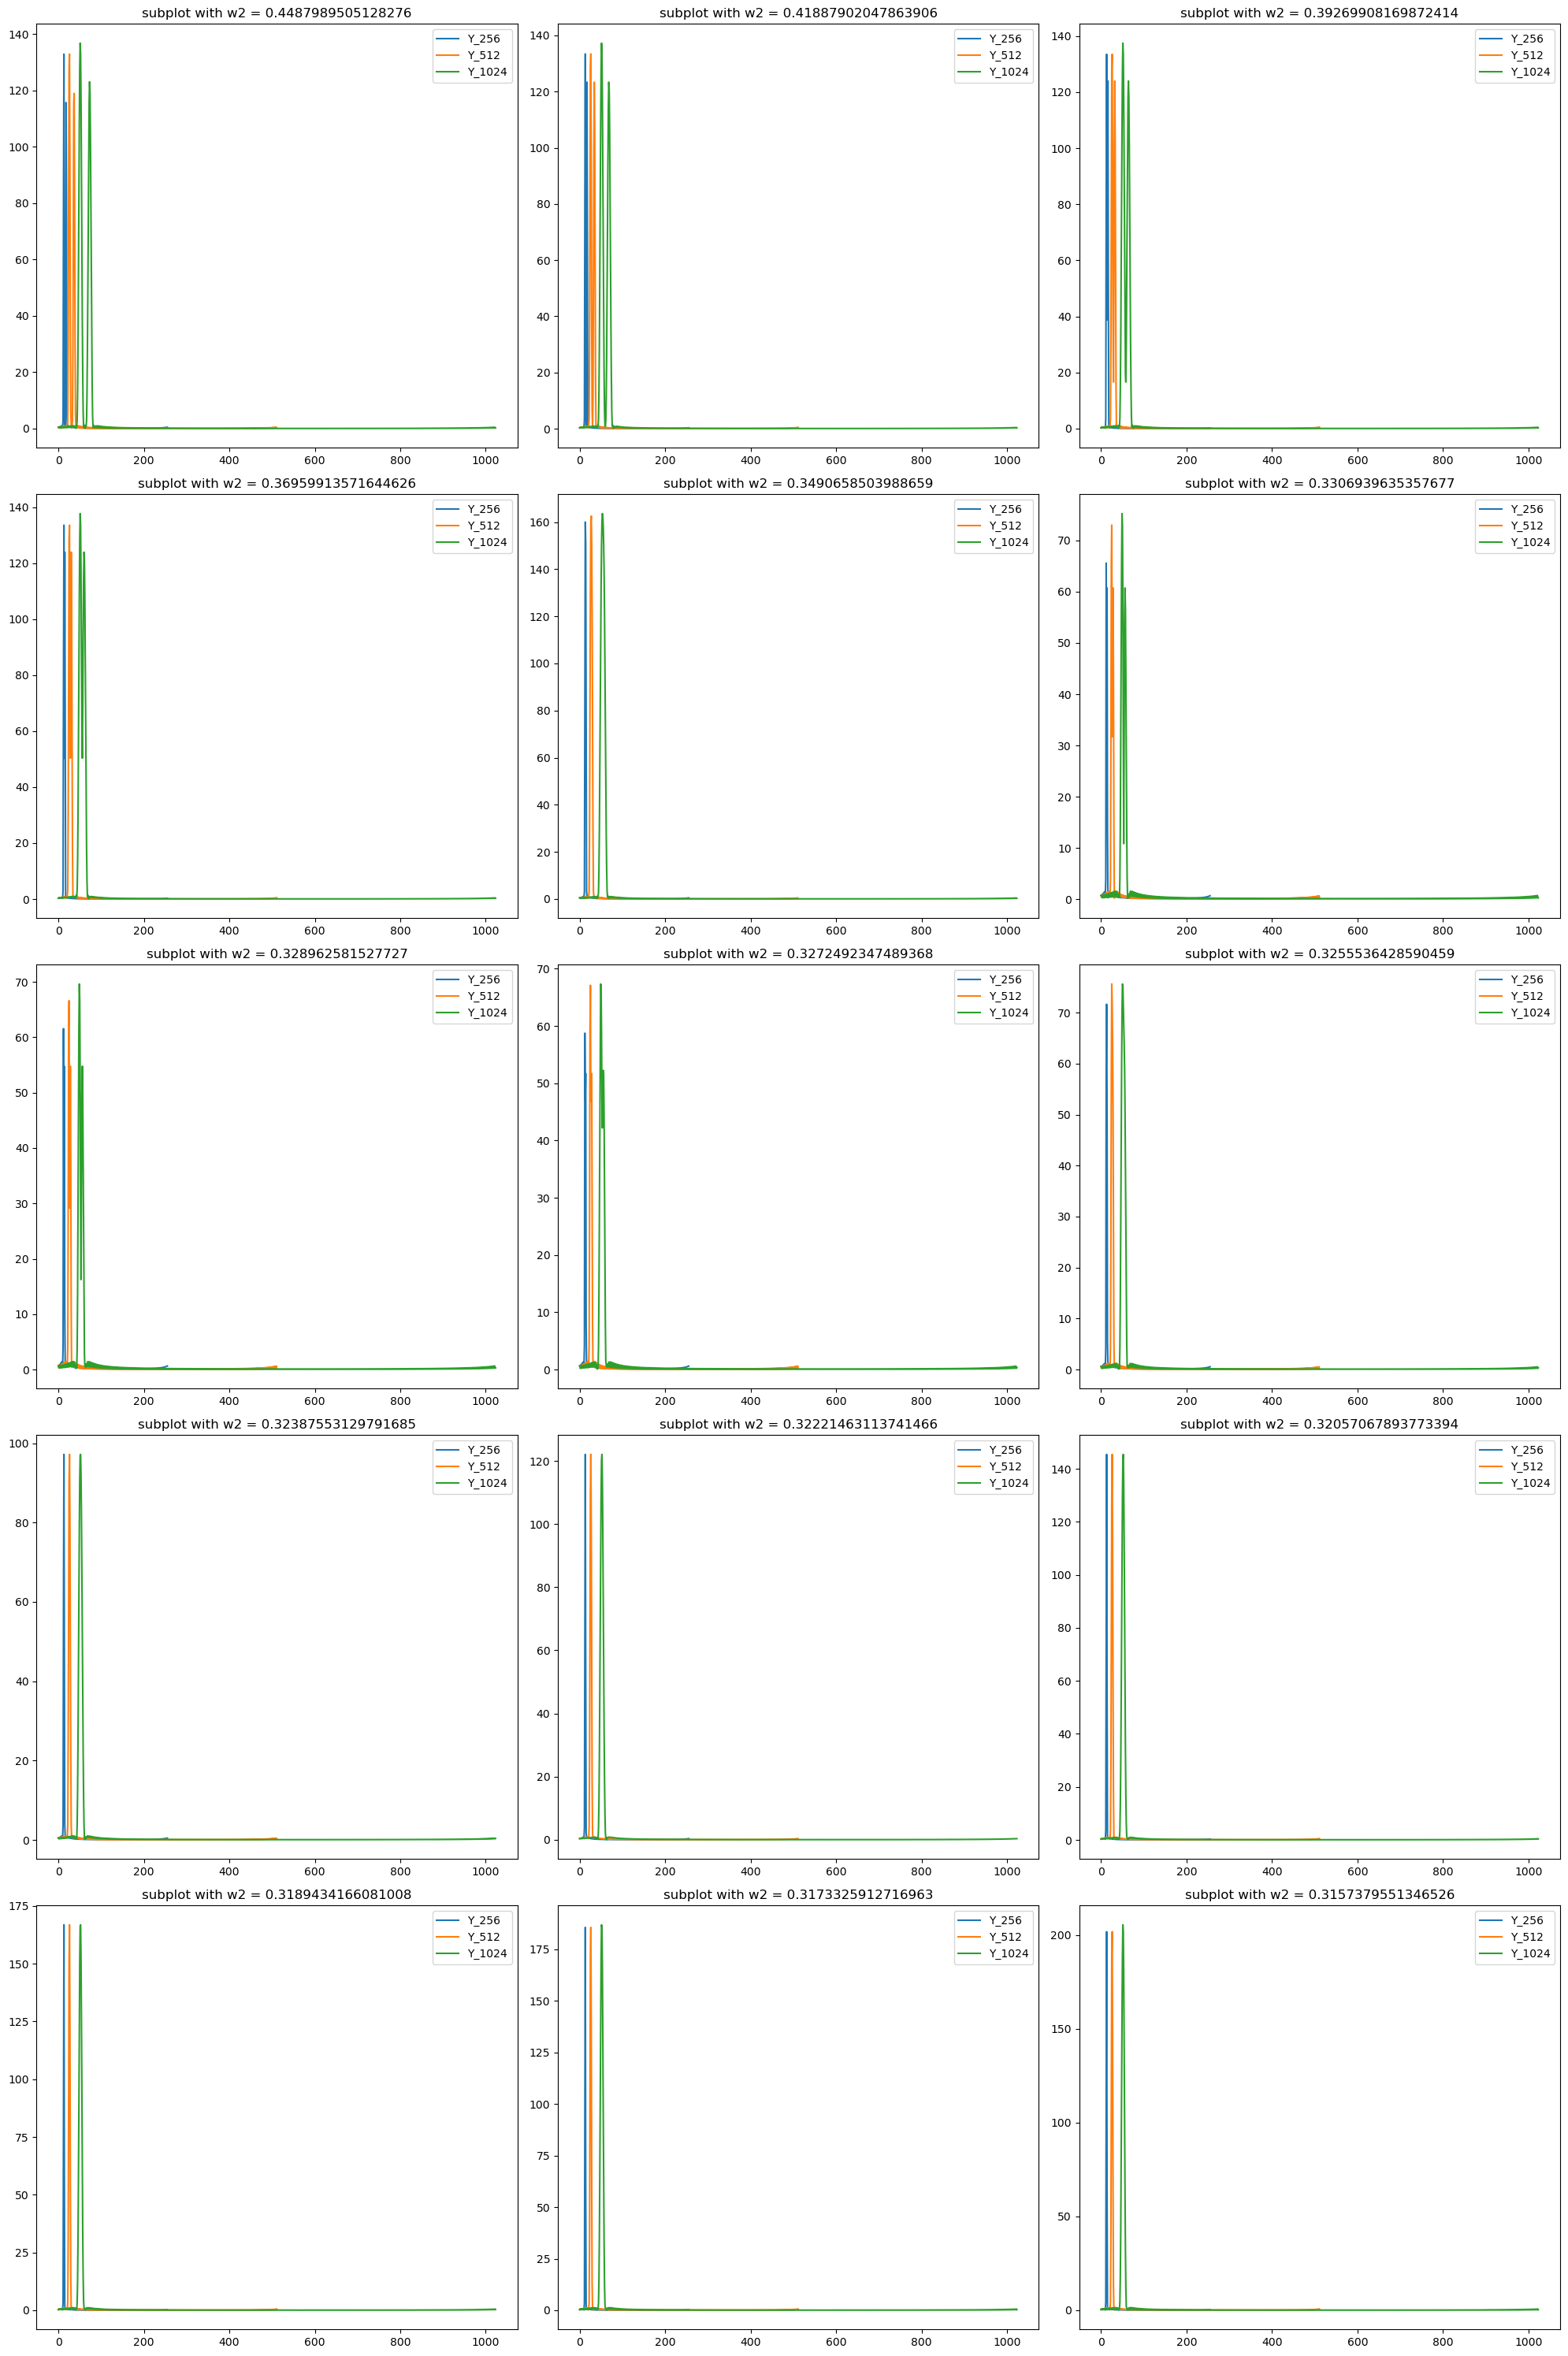

In [29]:
y_512 = [np.append(y, np.zeros(256)) for y in y_arr]  # y = 1x256 -> 1x512
y_1024 = [np.append(y, np.zeros(256 + 512)) for y in y_arr]  # y = 1x256 -> 1x512
Y_512 = [np.fft.fft(y) for y in y_512]
Y_1024 = [np.fft.fft(y) for y in y_1024]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, ax in enumerate(axes.flat):  # the flat func makes the 2d array into a 1d
    # ax.plot(X1, label='X1')
    # ax.plot(X2_arr[i], label='X2')
    ax.plot(np.abs(Y[i]), label='Y_256')
    ax.plot(np.abs(Y_512[i]), label='Y_512')
    ax.plot(np.abs(Y_1024[i]), label='Y_1024')
    ax.legend()
    ax.set_title(f'subplot with w2 = {w2_arr[i]}')

fig.tight_layout()

plt.show()

## 1.3 ίδιο με το 1.1 απλά αλλάζω length σήματος

Initialising signals

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from cmath import exp

# Initial values:
A1, A2 = 1, 0.9
L_512, L_1024 = 512, 1024
w1 = pi / 10
phi1, phi2 = np.random.uniform(0, 2 * pi), np.random.uniform(0, 2 * pi)

w2_arr = [pi / (9 + 0.05 * i) for i in range(20)]
threshold_512_zero_padding = 0.3696
w2_arr.append(threshold_512_zero_padding)
threshold_1024_zero_padding = 0.3491
w2_arr.append(threshold_1024_zero_padding)

x2_arr_512 = np.array([[A2 * exp(1j * (w2 * n + phi2)) for n in range(L_512)] for w2 in w2_arr])
x2_arr_1024 = np.array([[A2 * exp(1j * (w2 * n + phi2)) for n in range(L_1024)] for w2 in w2_arr])

x1_512 = np.array([A1 * exp(1j * (w1 * n + phi1)) for n in range(L_512)])
x1_1024 = np.array([A1 * exp(1j * (w1 * n + phi1)) for n in range(L_1024)])
w_512 = np.hamming(L_512)
w_1024 = np.hamming(L_1024)

# C = A * B se np array to C θα έχει διαστάσεις του  A,B kai C[i] = A[i] * B[i] αντίστοιχα για το  +
y_arr_512 = [w_512 * (x1_512 + x2_arr_512[i]) for i in range(len(x2_arr_512))]
y_arr_1024 = [w_1024 * (x1_1024 + x2_arr_1024[i]) for i in range(len(x2_arr_1024))]

Plotting dft

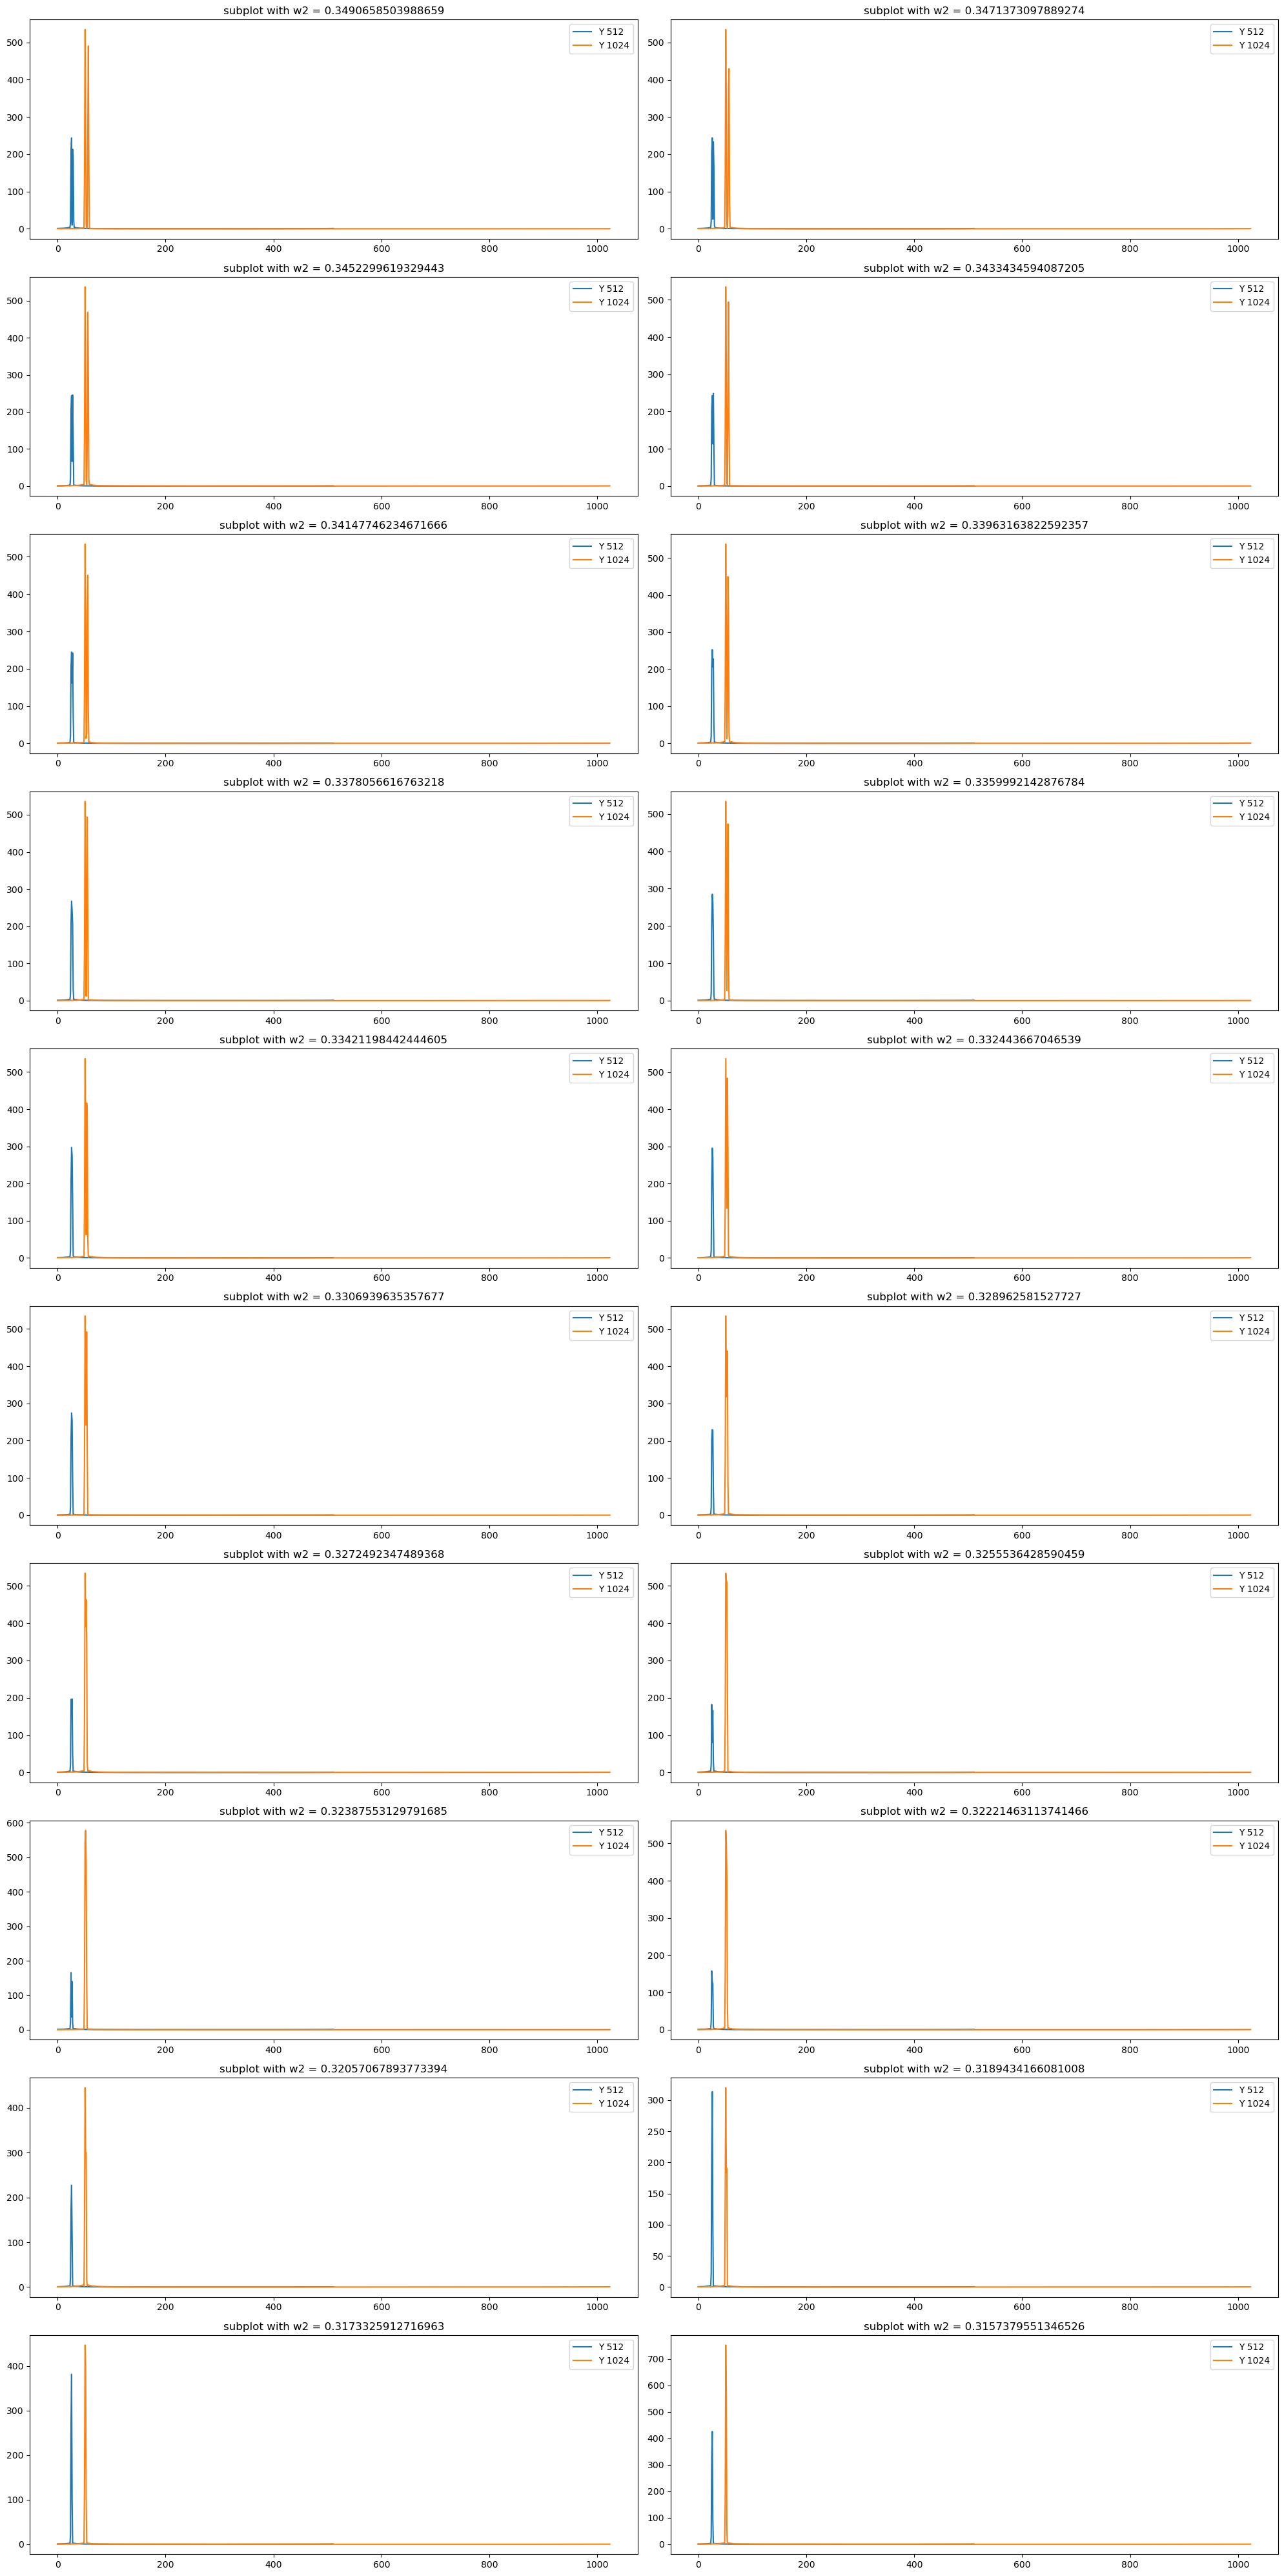

In [31]:
Y_512 = [np.fft.fft(y) for y in y_arr_512]
Y_1024 = [np.fft.fft(y) for y in y_arr_1024]

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 40))

for i, ax in enumerate(axes.flat):  # the flat func makes the 2d array into a 1d
    ax.plot(np.abs(Y_512[i]), label='Y 512')
    ax.plot(np.abs(Y_1024[i]), label='Y 1024')
    ax.legend()
    ax.set_title(f'subplot with w2 = {w2_arr[i]}')

fig.tight_layout()

plt.show()

Plotting 256 Threshold in 512 and 1024 samples

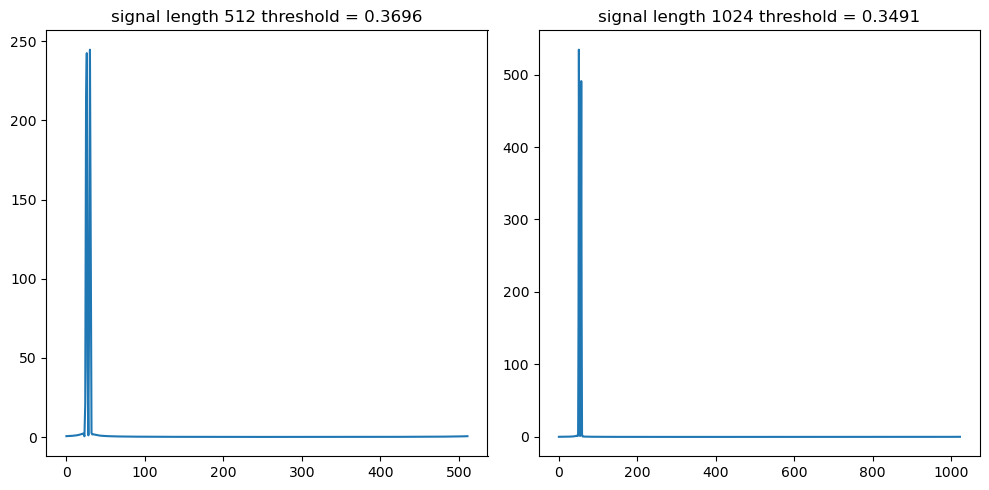

In [32]:
Y_512_with_512_zero_padding_threshold = np.fft.fft(y_arr_512[20])
Y_1024_with_1024_zero_padding_threshold = np.fft.fft(y_arr_1024[21])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].plot(np.abs(Y_512_with_512_zero_padding_threshold), label='Y 512')
axes[0].set_title(f'signal length 512 threshold = {w2_arr[20]}')
axes[1].plot(np.abs(Y_1024_with_1024_zero_padding_threshold), label='Y 1024')
axes[1].set_title(f'signal length 1024 threshold = {w2_arr[21]}')

fig.tight_layout()

plt.show()

## 1.4 Διαφορές Hamming - Rectangular window

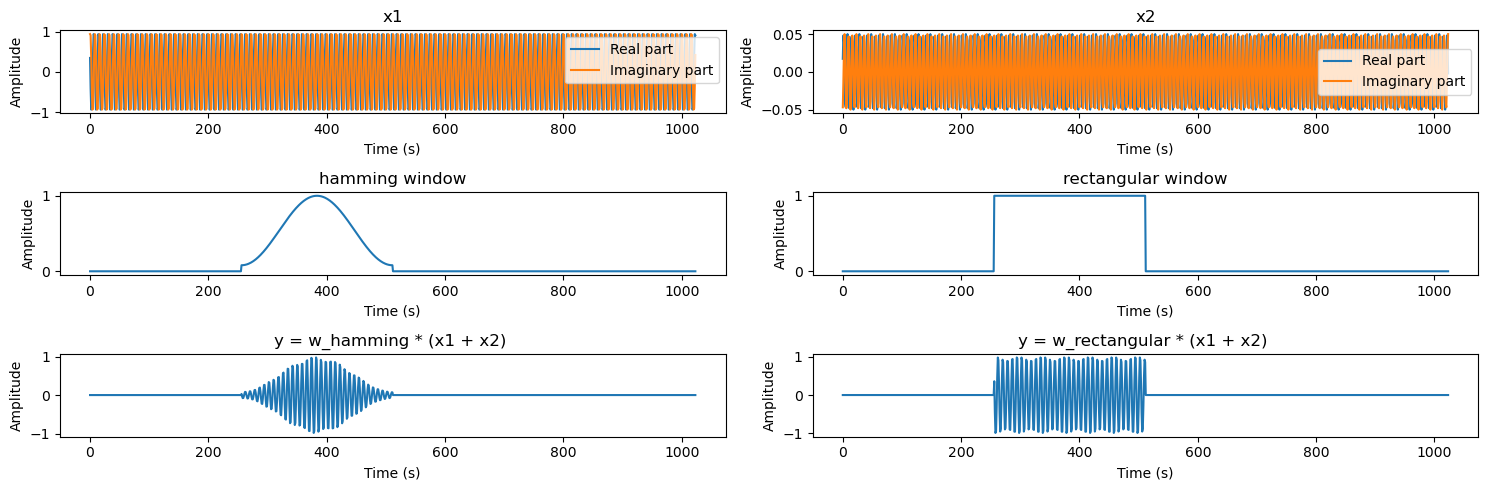

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from cmath import exp

# Initial values:
A1, A2 = 1, 0.05
L = 256
N = 1024
w1, w2 = 0.25 * pi, 0.3 * pi
phi1, phi2 = np.random.uniform(0, 2 * pi), np.random.uniform(0, 2 * pi)

x1 = np.array([A1 * exp(1j * (w1 * n + phi1)) for n in range(N)])
x2 = np.array([A2 * exp(1j * (w2 * n + phi2)) for n in range(N)])
w_hamm, w_rect = np.zeros(N), np.zeros(N)
w_rect[256:512], w_hamm[256:512] = 1, np.hamming(L)

# C = A * B se np array to C θα έχει διαστάσεις του  A,B kai C[i] = A[i] * B[i] αντίστοιχα για το  +
y_hamm = w_hamm * (x1 + x2)
y_rect = w_rect * (x1 + x2)

Ts = 1  # time interval between samples.
t = np.arange(0, N, Ts)

# Plot the signal
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 5))

axs[0][0].plot(t, np.real(x1), label='Real part')
axs[0][0].plot(t, np.imag(x1), label='Imaginary part')
axs[0][0].set_xlabel('Time (s)')
axs[0][0].set_ylabel('Amplitude')
axs[0][0].set_title('x1')
axs[0][0].legend()

axs[0][1].plot(t, np.real(x2), label='Real part')
axs[0][1].plot(t, np.imag(x2), label='Imaginary part')
axs[0][1].set_xlabel('Time (s)')
axs[0][1].set_ylabel('Amplitude')
axs[0][1].set_title('x2')
axs[0][1].legend()

axs[1][0].plot(t, w_hamm)
axs[1][0].set_xlabel('Time (s)')
axs[1][0].set_ylabel('Amplitude')
axs[1][0].set_title('hamming window')

axs[1][1].plot(t, w_rect)
axs[1][1].set_xlabel('Time (s)')
axs[1][1].set_ylabel('Amplitude')
axs[1][1].set_title('rectangular window')

axs[2][0].plot(t, y_hamm)
axs[2][0].set_xlabel('Time (s)')
axs[2][0].set_ylabel('Amplitude')
axs[2][0].set_title(f'y = w_hamming * (x1 + x2) ')

axs[2][1].plot(t, y_rect)
axs[2][1].set_xlabel('Time (s)')
axs[2][1].set_ylabel('Amplitude')
axs[2][1].set_title(f'y = w_rectangular * (x1 + x2) ')

# Add spacing between subplots.
fig.tight_layout()

plt.show()

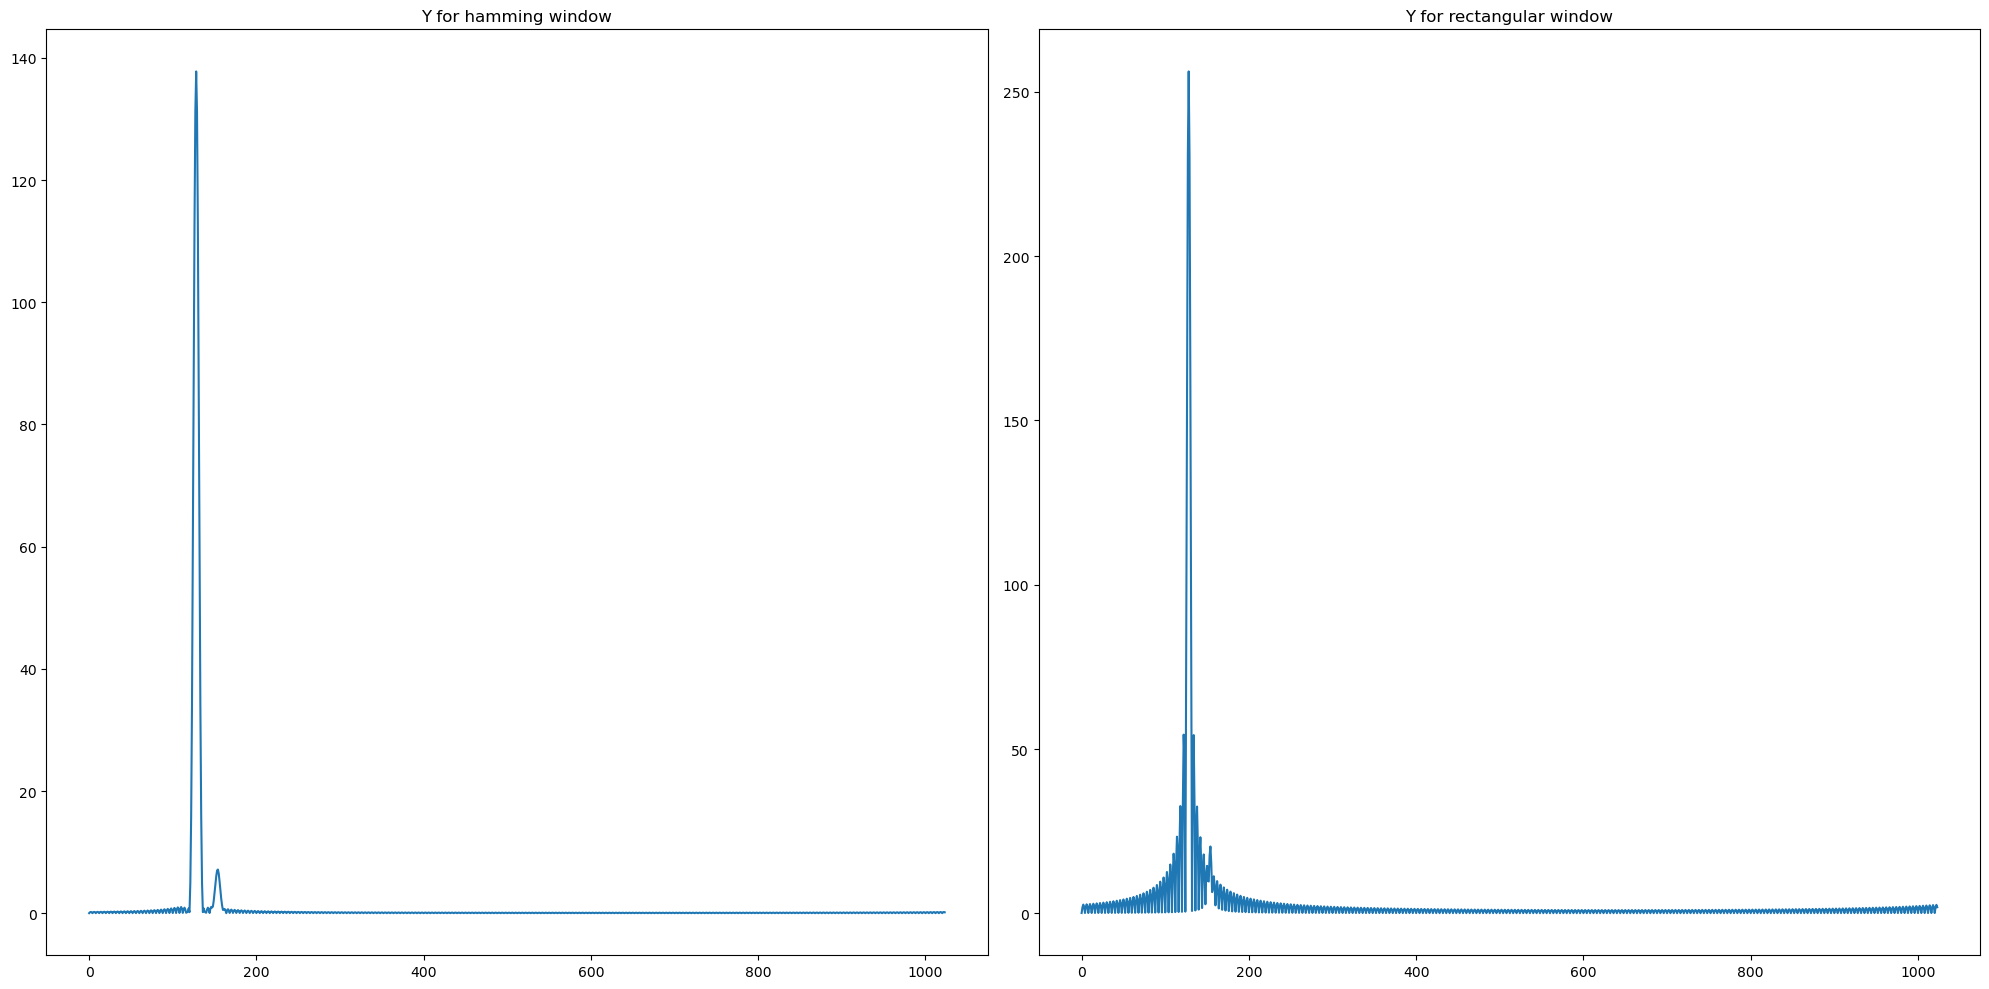

In [34]:
Y_hamm = np.abs(np.fft.fft(y_hamm))
Y_rect = np.abs(np.fft.fft(y_rect))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].plot(Y_hamm)
axes[0].set_title('Y for hamming window')

axes[1].plot(Y_rect)
axes[1].set_title('Y for rectangular window')

fig.tight_layout()

plt.show()

# Άσκηση 2

### 2.1
**low freq for row, high freq for col**
<img src="button_frequencies_matrix.jpg">

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List
from IPython.display import Audio
from numpy import sin

# Table of frequencies:
L = 1000
Row_freq = [0.5346, 0.5906, 0.6535, 0.7217]
Col_freq = [0.9273, 1.0247, 1.1328]
btn_sounds = {"1": [sin(Row_freq[0] * n) + sin(Col_freq[0] * n) for n in range(L)],
              "2": [sin(Row_freq[0] * n) + sin(Col_freq[1] * n) for n in range(L)],
              "3": [sin(Row_freq[0] * n) + sin(Col_freq[2] * n) for n in range(L)],
              "4": [sin(Row_freq[1] * n) + sin(Col_freq[0] * n) for n in range(L)],
              "5": [sin(Row_freq[1] * n) + sin(Col_freq[1] * n) for n in range(L)],
              "6": [sin(Row_freq[1] * n) + sin(Col_freq[2] * n) for n in range(L)],
              "7": [sin(Row_freq[2] * n) + sin(Col_freq[0] * n) for n in range(L)],
              "8": [sin(Row_freq[2] * n) + sin(Col_freq[1] * n) for n in range(L)],
              "9": [sin(Row_freq[2] * n) + sin(Col_freq[2] * n) for n in range(L)],
              "0": [sin(Row_freq[3] * n) + sin(Col_freq[1] * n) for n in range(L)]
              }

display(Audio(btn_sounds["6"], rate=44100))

### 2.2

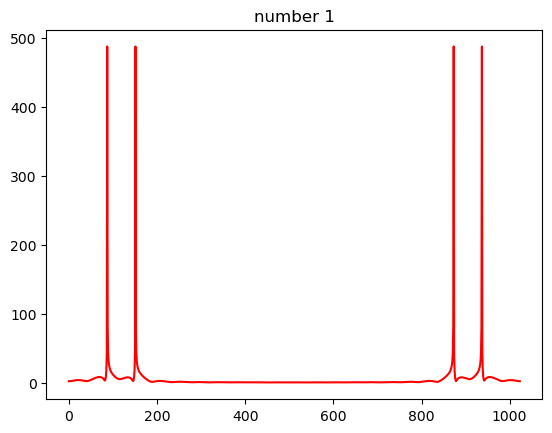

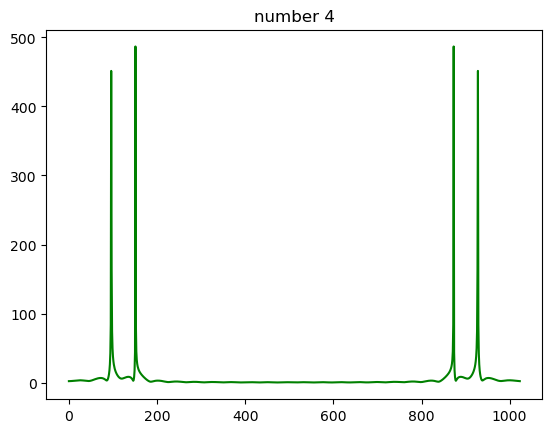

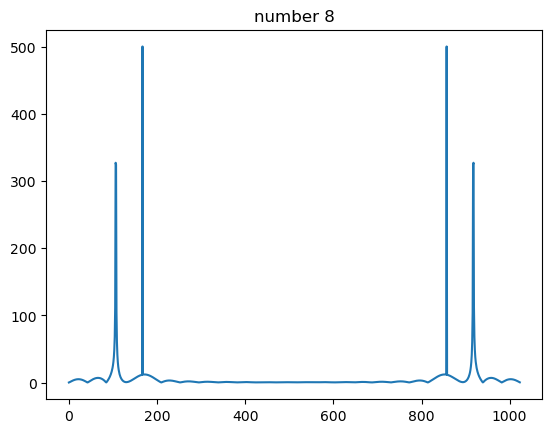

In [36]:
btn_dfts = {}

# Compute the FFT of each sound signal and add it to the btn_dft dictionary
for btn, sound_signal in btn_sounds.items():
    sound_signal_padded = np.copy(sound_signal)
    sound_signal_padded = np.pad(sound_signal_padded, (0, 24), mode='constant', constant_values=0)
    btn_dfts[btn] = np.abs(np.fft.fft(sound_signal_padded))

# todo Να τα βάλω να βγαίνουν στην σειρά

plt.figure()
plt.plot(btn_dfts["1"], color='r')
plt.title('number 1')
plt.figure()
plt.plot(btn_dfts["4"], color='g')
plt.title('number 4')
plt.figure()
plt.plot(btn_dfts["8"])
plt.title('number 8')

plt.show()

Δεν ξέρω τι παρατηρώ :(...

### 2.3

In [37]:
from scipy.io import wavfile

am, am_sound = '06240996', []
for digit in am:
    am_sound = np.concatenate([am_sound, btn_sounds[digit], np.zeros(100)])
am_sound = am_sound[:-100]  # to delete tail's zeros

am_sound_norm = np.int16(am_sound / np.max(np.abs(am_sound)) * 32767)

wavfile.write(filename='tone_sequence.wav', rate=44100, data=am_sound_norm)

display(Audio(am_sound, rate=44100))

### 2.4

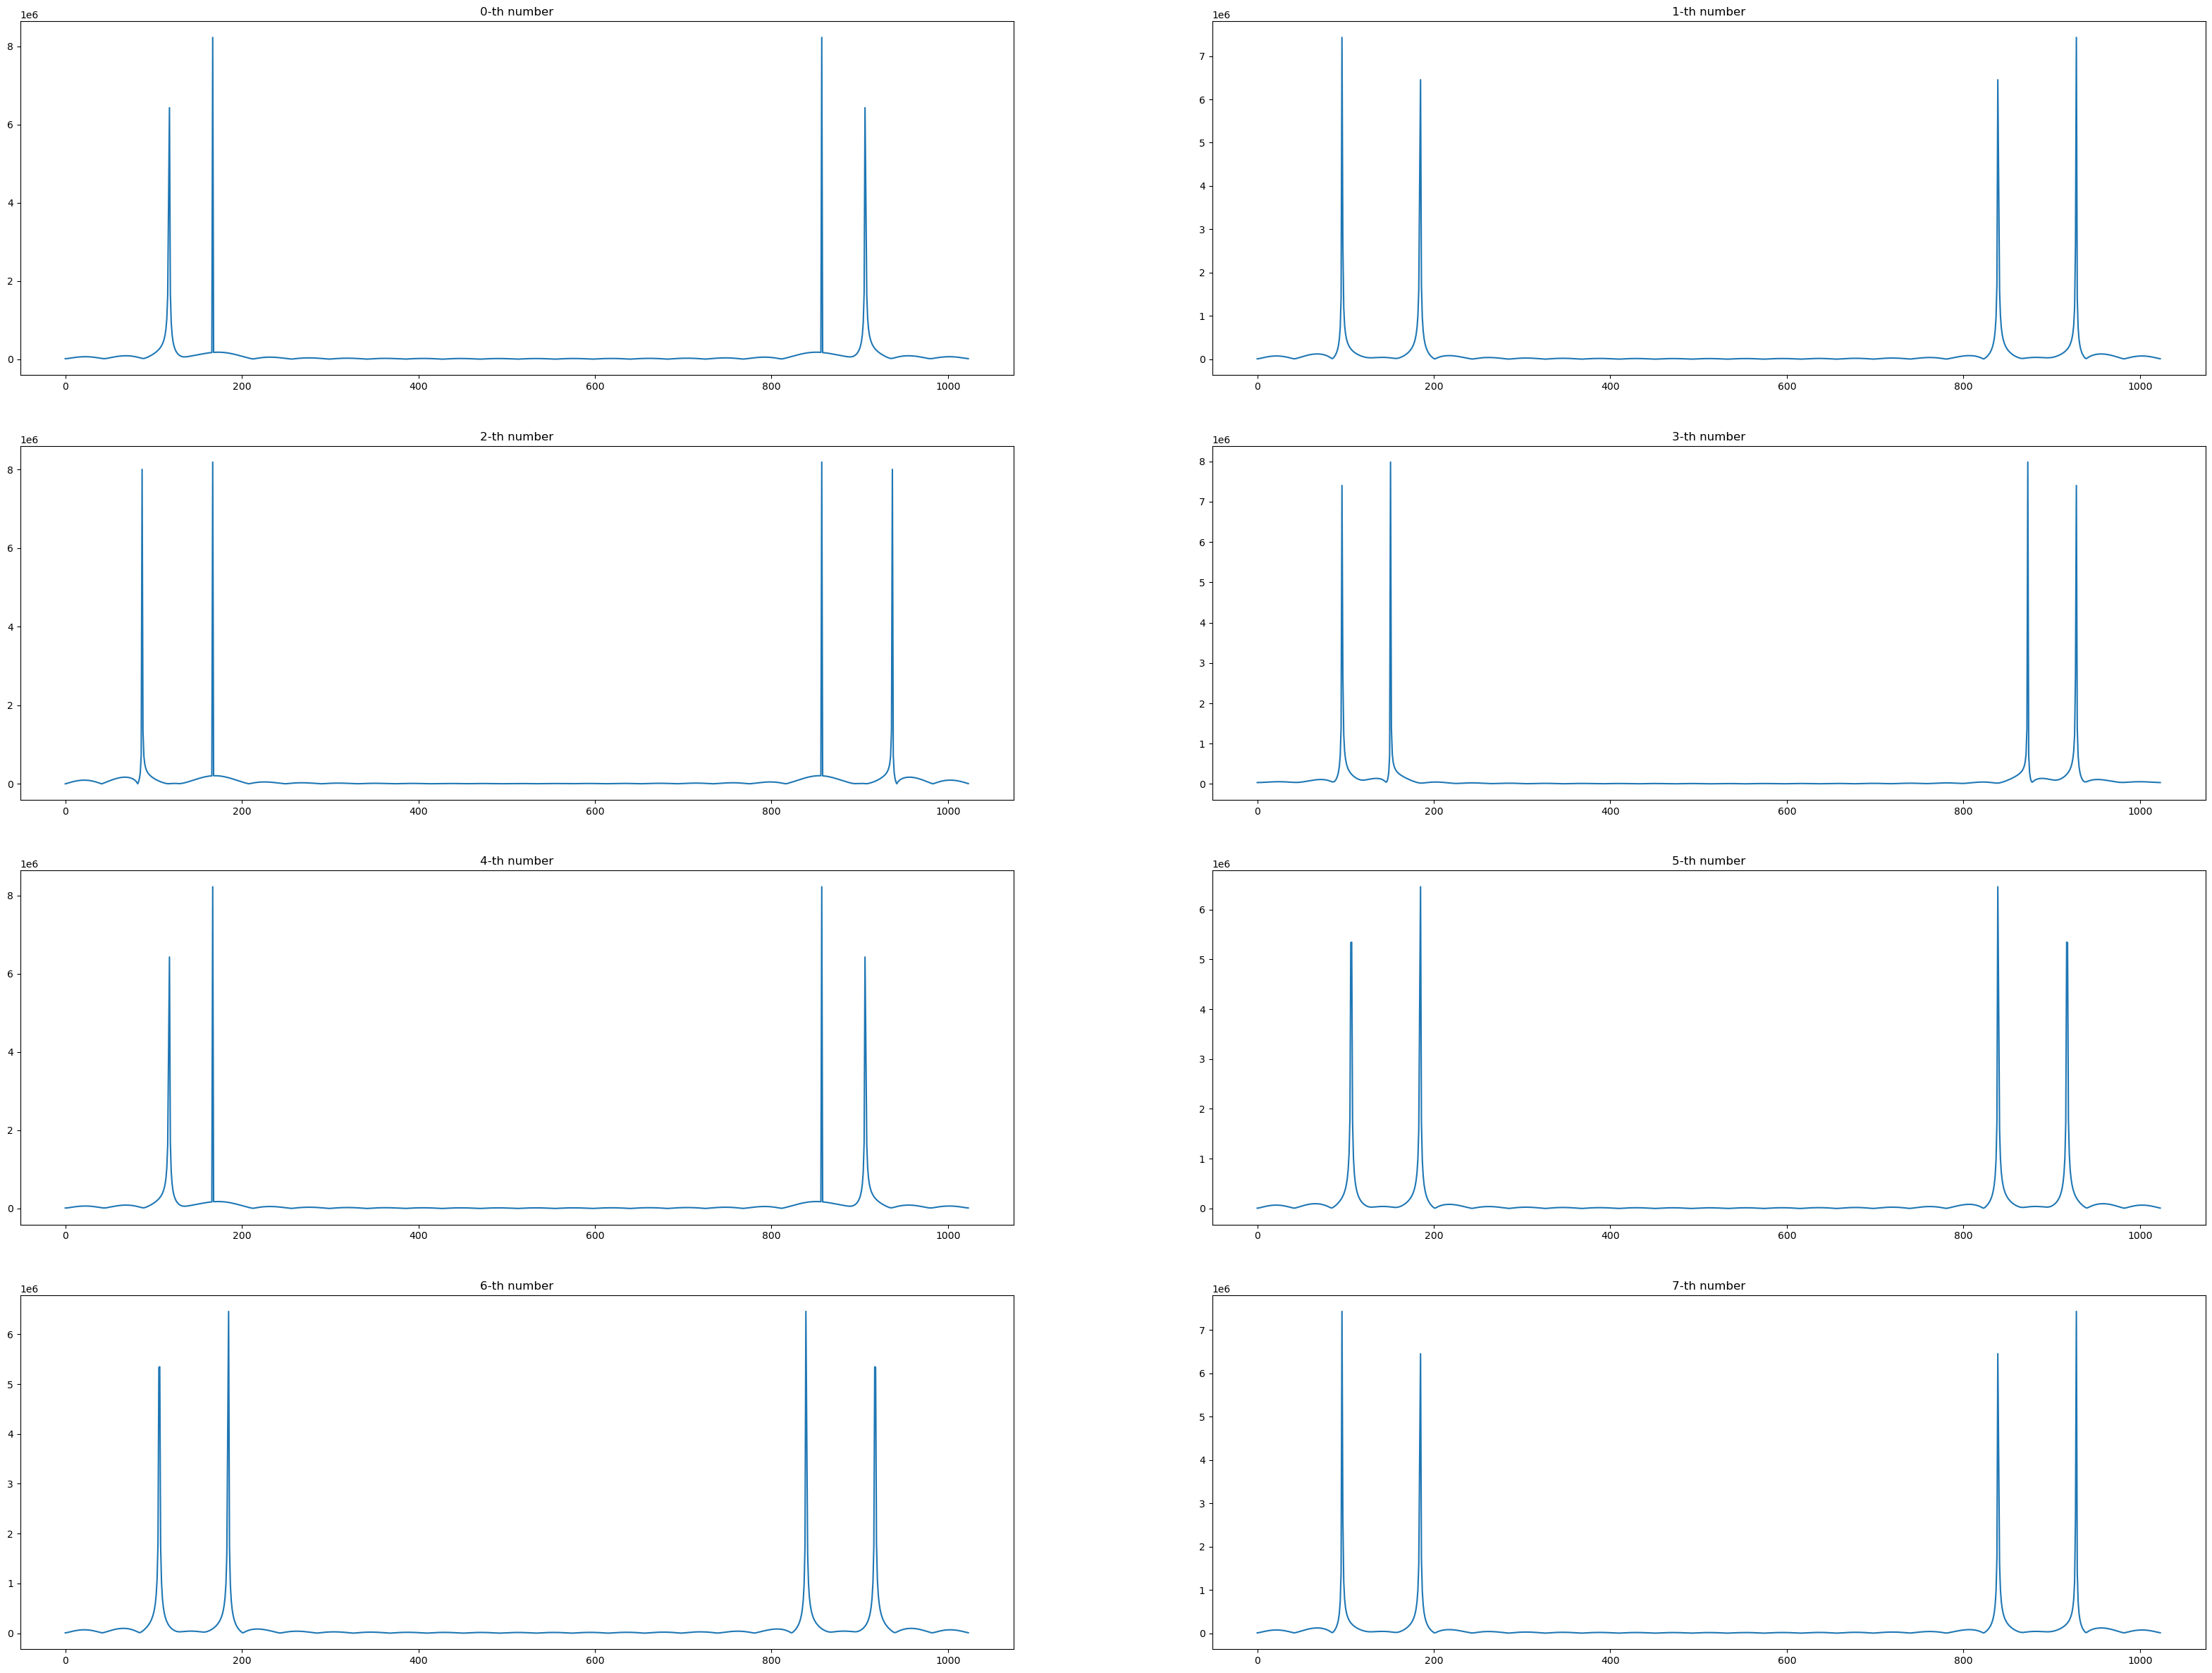

In [38]:
N = 1024
w_hamm, w_rect = np.zeros(N), np.zeros(N)
w_rect[:1000], w_hamm[:1000] = 1, np.hamming(L)



sig_len = len(am_sound_norm)
Digits_fourier = []
for i in range(0, sig_len, (1000 + 100)):
    am_sound_padded = np.copy(am_sound_norm[i:i + 1000])
    am_sound_padded = np.pad(am_sound_padded, (0, 24), mode='constant', constant_values=0)
    # make it 1024 with zero padding.
    Digits_fourier.append(np.abs(np.fft.fft(w_rect * am_sound_padded) ) )

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(40, 30))

for i, ax in enumerate(axes.flat):  # the flat func makes the 2d array into a 1d
    ax.plot(Digits_fourier[i])
    ax.set_title(f'{i}-th number')

### 2.5

In [39]:
from scipy.spatial.distance import euclidean


# noinspection PyShadowingNames
def neighrest_btn(btns: dict, in_btn: list):
    distance_from_all_btns = [(btn, euclidean(in_btn, btn_dft)) for btn, btn_dft in btns.items()]  # : List[Tuple[btn_number, btn_Fourier]]
    distance_from_all_btns.sort(key=lambda x: x[1])  # sort based on distance not index
    return distance_from_all_btns[0][0]


Predicted_numbers = [neighrest_btn(btn_dfts, in_btn) for in_btn in Digits_fourier]
Predicted_numbers

['0', '6', '2', '4', '0', '9', '9', '6']

### 2.6

In [40]:
def ttdecode(signIn: List) -> List[float]:
    rect = np.zeros(1024)
    rect[:1000] = 1

    # Παίρνουμε τη φασματική απεικόνιση κάθε ψηφίου του σήματος προς ανάλυση.
    signIn_digits_dft = []

    i = 0
    while i < len(signIn):
        signIn_padded = np.copy(signIn[i:i + 1000])
        signIn_padded = np.pad(signIn_padded, (0, 24), mode='constant', constant_values=0)
        signIn_digits_dft.append(np.abs((np.fft.fft(rect * signIn_padded))) )

        # Αν πλάτος < 10% του μέσου πλάτους σήματος αγνόησε το
        average_amp = np.max(signIn[i:i+1000])

        while signIn[i + 1] < average_amp * 0.1:
            i += 1
        i += 1000

    # Επιστρέφουμε τα ψηφία απο το σήμα προς ανάλυση
    return [neighrest_btn(btn_dfts, in_btn) for in_btn in signIn_digits_dft]


digits_of_am_sound = ttdecode(am_sound_norm)
digits_of_am_sound

['0', '6', '2', '4', '0', '9', '9', '6']

### 2.7

In [41]:
easy_sig = np.load('dsp23_lab1_Data/easy_sig.npy')
medium_sig = np.load('dsp23_lab1_Data/medium_sig.npy')
hard_sig = np.load('dsp23_lab1_Data/hard_sig.npy')

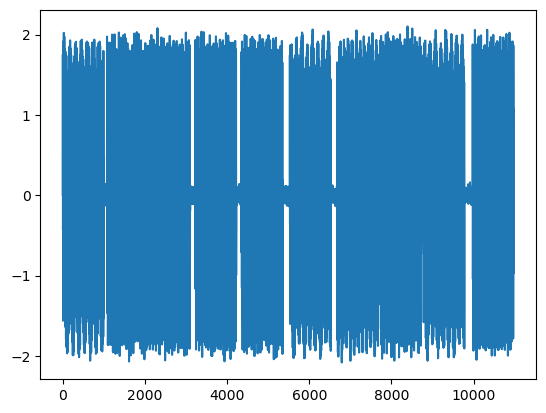

In [42]:
plt.plot(hard_sig)
# plt.xlim(990, 1300)
plt.show()

In [43]:

easy_number = ttdecode(easy_sig)
medium_number = ttdecode(medium_sig)
hard_number = ttdecode(hard_sig)

easy_number, medium_number, hard_number

(['3', '1', '4', '0', '4', '8', '1', '5'],
 ['3', '2', '4', '8', '8', '2', '1', '0', '9', '6'],
 ['2', '0', '4', '4', '9', '6', '3', '7', '6', '4'])

## Άσκηση 3

16000


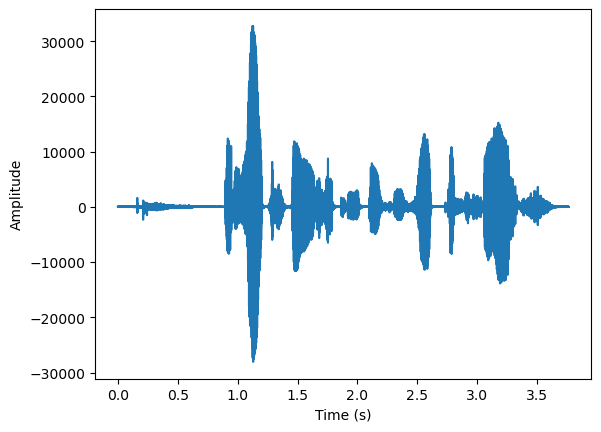

In [9]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Open the .wav file
wav_file = wave.open('dsp23_lab1_Data/speech_utterance_changed.wav', 'rb')

fs = 16000
# Get the audio data
frames = wav_file.readframes(-1)
signal = np.frombuffer(frames, dtype='int16')

# Get the frame rate
frame_rate = wav_file.getframerate()
print(frame_rate)

# Get the time axis in seconds
time = np.linspace(0, len(signal) / frame_rate, num=len(signal))

# Plot the waveform
plt.plot(time, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Cleanup
wav_file.close()
